In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [10]:
# Beijing Multi-Site Air-Quality Data Data Set used for pre-processing 

#No: row number
#year: year of data in this row
#month: month of data in this row
#day: day of data in this row
#hour: hour of data in this row
#PM2.5: PM2.5 concentration (ug/m^3)
#PM10: PM10 concentration (ug/m^3)
#SO2: SO2 concentration (ug/m^3)
#NO2: NO2 concentration (ug/m^3)
#CO: CO concentration (ug/m^3)
#O3: O3 concentration (ug/m^3)
#TEMP: temperature (degree Celsius)
#PRES: pressure (hPa)
#DEWP: dew point temperature (degree Celsius)
#RAIN: precipitation (mm)
#wd: wind direction
#WSPM: wind speed (m/s)
#station: name of the air-quality monitoring site


def parse(x):
    '''
    combine year,month,day,hour to a single columns
    '''
    return datetime.strptime(x, '%Y %m %d %H')

df=pd.read_csv('data.csv',parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
df = df.drop(['station','No'] , axis='columns') # drop unnecessary columns 
df.index.name='time'
df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
time,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5
2013-03-01 01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7
2013-03-01 02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2
2013-03-01 03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0
2013-03-01 04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1
2013-03-01 05:00:00,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7
2013-03-01 06:00:00,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8
2013-03-01 07:00:00,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5
2013-03-01 08:00:00,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8


In [11]:
#check the null values 

for col in df.columns:
    null_val = df[col].isnull().sum()
    perc = null_val / df.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (col, null_val, perc))

> PM2.5, Missing: 774 (2.2%)
> PM10, Missing: 582 (1.7%)
> SO2, Missing: 628 (1.8%)
> NO2, Missing: 667 (1.9%)
> CO, Missing: 1521 (4.3%)
> O3, Missing: 604 (1.7%)
> TEMP, Missing: 53 (0.2%)
> PRES, Missing: 50 (0.1%)
> DEWP, Missing: 53 (0.2%)
> RAIN, Missing: 51 (0.1%)
> wd, Missing: 140 (0.4%)
> WSPM, Missing: 43 (0.1%)


In [14]:
#Linear interpolation for handle missing values
df_fill= df.interpolate(method ='linear')
df_fill = df.ffill()

In [17]:
#Categorical label encoding
from sklearn.preprocessing import LabelEncoder

df_fill['wd'] = LabelEncoder().fit_transform(df_fill['wd'])
df_fill

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
time,,,,,,,,,,,,
2013-03-01 00:00:00,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,0,0.5
2013-03-01 01:00:00,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,1,0.7
2013-03-01 02:00:00,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,1,0.2
2013-03-01 03:00:00,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,5,1.0
2013-03-01 04:00:00,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,3,2.1
2013-03-01 05:00:00,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,6,1.7
2013-03-01 06:00:00,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,6,1.8
2013-03-01 07:00:00,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,7,2.5
2013-03-01 08:00:00,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,6,2.8


<AxesSubplot:>

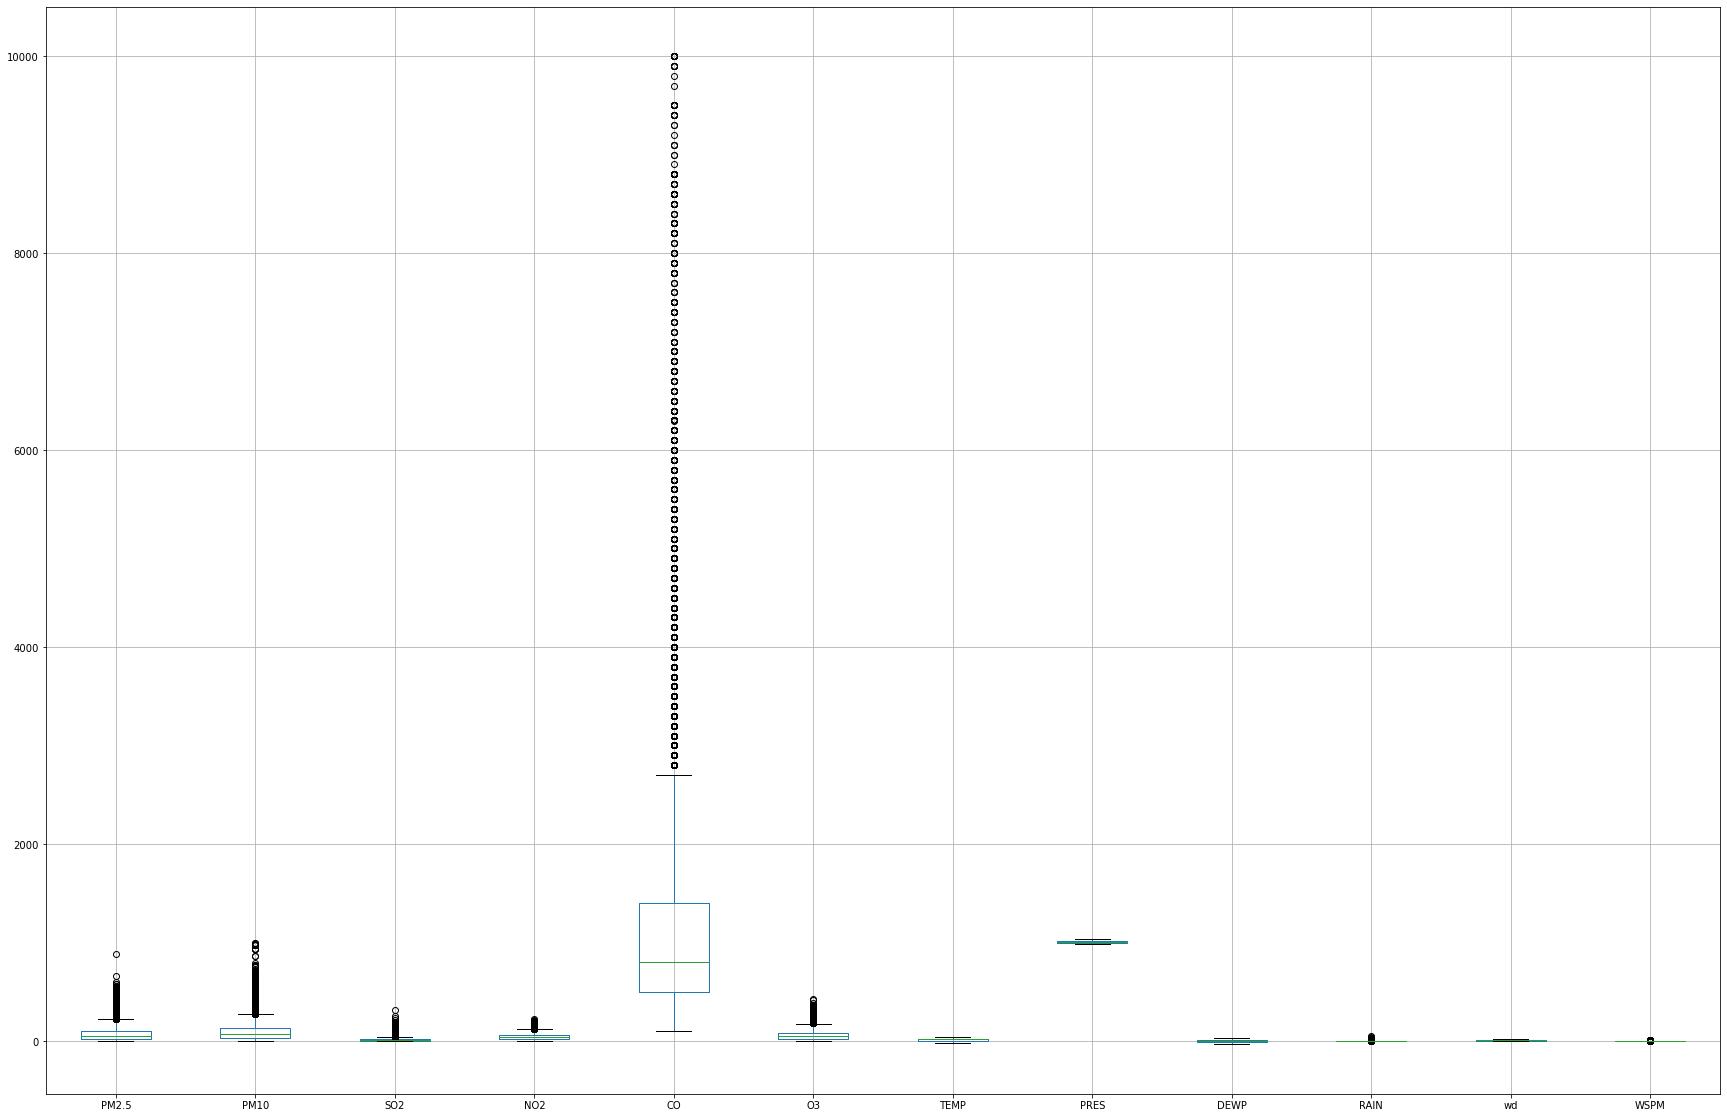

In [24]:
#Check for outlaiers
import warnings
warnings.filterwarnings("ignore")

df_fill.boxplot(column=list(df_fill),figsize=(30,20))
#df.columns.values